# E-commerce Sales Data Analysis Using Python

## Problem Statement:
The management of an online retail store wants to analyze their sales data to identify trends and customer segments. They are particularly interested in understanding:

Which product categories generate the most revenue?
How sales have trended over time, including seasonality?
Which customer segments are the most valuable to the business in terms of revenue and order frequency?

In [1]:
#install kaggle
pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta 

In [3]:
#download dataset using kaggle api
import kaggle
!kaggle datasets download carrie1/ecommerce-data -f data.csv

Dataset URL: https://www.kaggle.com/datasets/carrie1/ecommerce-data
License(s): unknown




  0%|          | 0.00/7.20M [00:00<?, ?B/s]
 14%|#3        | 1.00M/7.20M [00:08<00:50, 128kB/s]
 14%|#3        | 1.00M/7.20M [00:19<00:50, 128kB/s]
 28%|##7       | 2.00M/7.20M [01:11<03:30, 25.9kB/s]
 28%|##7       | 2.00M/7.20M [01:30<03:30, 25.9kB/s]
 42%|####1     | 3.00M/7.20M [02:16<03:36, 20.3kB/s]
 42%|####1     | 3.00M/7.20M [02:30<03:36, 20.3kB/s]
 56%|#####5    | 4.00M/7.20M [03:53<03:43, 15.0kB/s]
 56%|#####5    | 4.00M/7.20M [04:10<03:43, 15.0kB/s]
 69%|######9   | 5.00M/7.20M [04:39<02:14, 17.2kB/s]
 69%|######9   | 5.00M/7.20M [04:50<02:14, 17.2kB/s]
 83%|########3 | 6.00M/7.20M [05:26<01:07, 18.6kB/s]
 83%|########3 | 6.00M/7.20M [05:40<01:07, 18.6kB/s]
 97%|#########7| 7.00M/7.20M [06:15<00:10, 19.4kB/s]
 97%|#########7| 7.00M/7.20M [06:30<00:10, 19.4kB/s]
100%|##########| 7.20M/7.20M [06:39<00:00, 17.6kB/s]
100%|##########| 7.20M/7.20M [06:39<00:00, 18.9kB/s]


In [7]:
#extract file
import zipfile
zip_ref = zipfile.ZipFile('data.csv.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [82]:
#read data and identifying null values
import numpy as np
import pandas as pd
data = pd.read_csv('data.csv',encoding='ISO-8859-1',na_values=['','NULL','N/A'])
print(data.head(5))
#print(data.isnull().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [83]:
#handling null values
data['Description'].fillna('Unknown', inplace= True)
data['CustomerID'].fillna(-1, inplace=True)
print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [84]:
#making columns to lower case
data.columns=data.columns.str.lower()

In [85]:
data.dtypes

invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid     float64
country         object
dtype: object

In [86]:
#convert InvoiceDate from object to datetime
data['invoicedate']=pd.to_datetime(data['invoicedate'], format='%m/%d/%Y %H:%M')
data.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid            float64
country                object
dtype: object

In [89]:
#total revenue generated for each transaction
data['totalrevenue']= data['quantity']*data['unitprice']
data

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalrevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [90]:
# Calculate total revenue per customer without modifying the original DataFrame
customer_revenue = data.groupby('customerid')['totalrevenue'].sum()

# Define a function for customer segmentation
def customer(revenue):
    if revenue > 500:
        return "High value"
    elif revenue > 100:
        return "Medium value"
    else:
        return 'Low value'

# Apply segmentation logic to customer revenue
customer_segments = customer_revenue.apply(customer)

# Use .map() to directly assign the segments to a new 'customersegments' column
data['customersegments'] = data['customerid'].map(customer_segments)

# Preview the DataFrame
data.head(20)


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalrevenue,customersegments
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,High value
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,High value
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,High value
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,High value
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,High value
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,High value
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,High value
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,High value
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,High value
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,High value


In [93]:
data['month'] = data['invoicedate'].dt.month
data['year'] = data['invoicedate'].dt.year

In [95]:
orderfrequency = data.groupby('customerid').size()
data['orderfrequency']=data['customerid'].map(orderfrequency)

In [96]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalrevenue,customersegments,month,year,orderfrequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,High value,12,2010,312
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,High value,12,2010,312
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,High value,12,2010,312
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,High value,12,2010,312
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,High value,12,2010,312


In [97]:
# Save the updated DataFrame to a new CSV file
data.to_csv('updated_data.csv', index=False)

#### 1. How sales have trended over time, including seasonality?

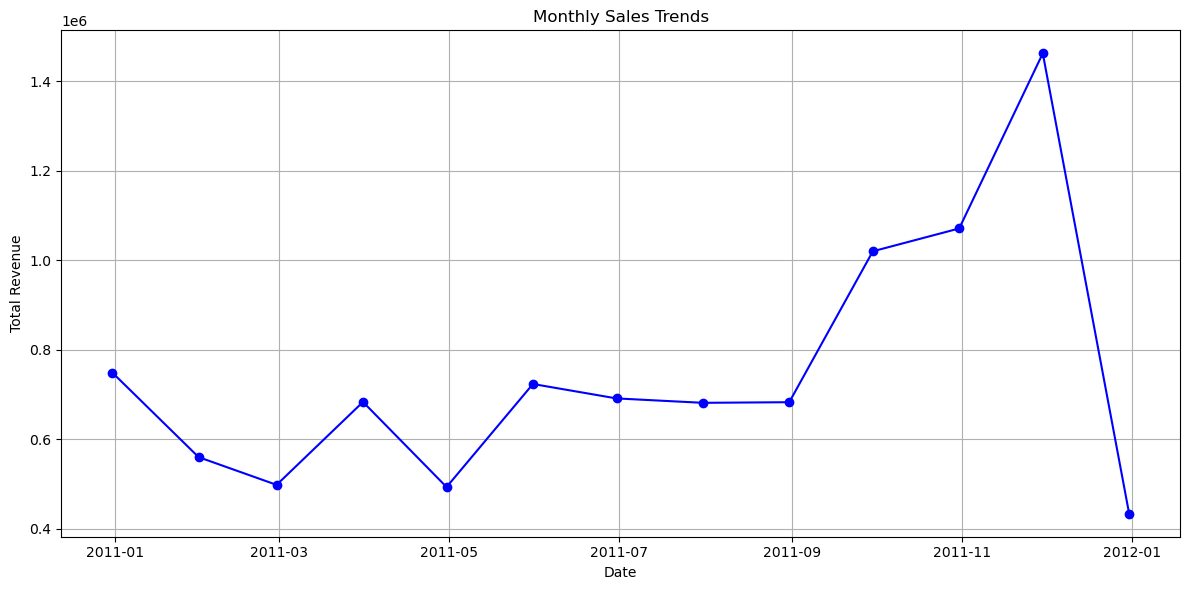

In [114]:
import matplotlib.pyplot as plt

# Resample the data by month and sum the total revenue
monthly_sales = data.resample('M', on='invoicedate')['totalrevenue'].sum()

# Plot the sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Which product categories generate the most revenue?

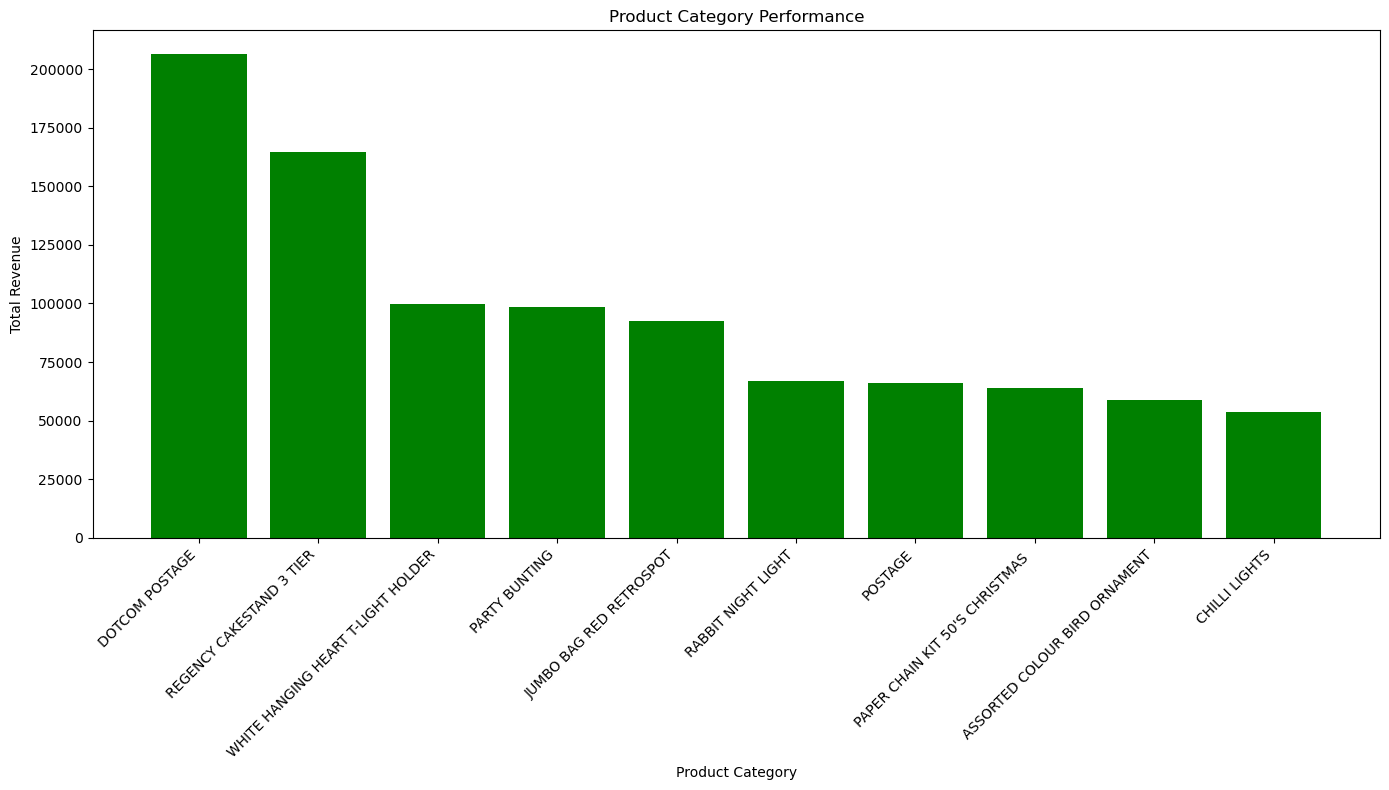

In [115]:
categoryperformance = data.groupby('description')['totalrevenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,8))
plt.bar(categoryperformance.index[:10],categoryperformance.values[:10],color='g')
plt.title('Product Category Performance')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 3. Which customer segments are the most valuable to the business in terms of revenue and order frequency?

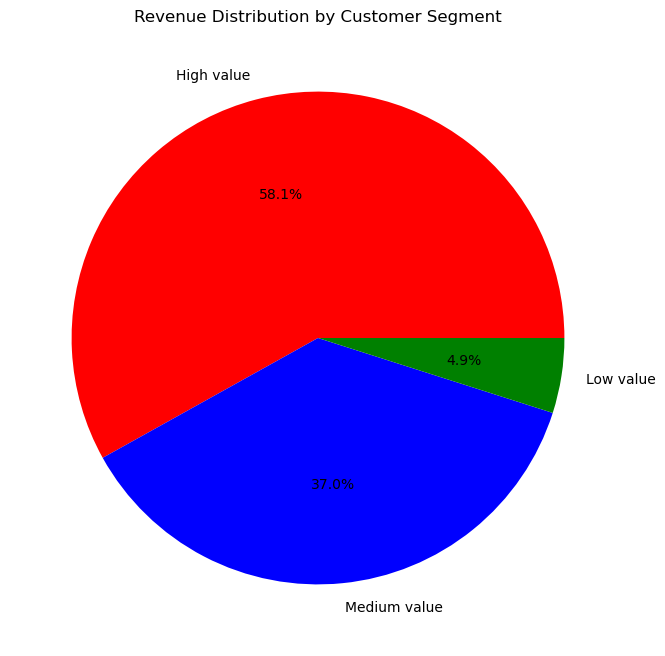

In [110]:
segment_revenue = customer_segments.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_revenue, labels=segment_revenue.index, autopct='%1.1f%%', colors=['r','b','g'])
plt.title('Revenue Distribution by Customer Segment')
plt.show()